In [163]:
import numpy as np
from random import randint
import random 
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  confusion_matrix
from tensorflow import keras
import tensorflow as tf
from tensorflow .keras .preprocessing import image
from tensorflow .keras .preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense,Activation,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow . keras . metrics import categorical_crossentropy 
import itertools
import matplotlib.pyplot as plt
import shutil 
import glob
import warnings
warnings.simplefilter(action='ignore' , category=FutureWarning)

In [2]:
train_label = []
train_sampels = []

In [3]:
for i in range (50):
    random_younger = randint (13 , 64)
    train_sampels.append (random_younger)
    train_label.append(1)
    random_older = randint (65, 100)
    train_sampels.append (random_older)
    train_label.append(0)
  
for i in range (1000):
    ra1dom_younger = randint (13 , 64)
    train_sampels.append (random_younger)
    train_label.append(0)
    
    random_older = randint (65, 100)
    train_sampels.append (random_older)
    train_label.append(1)


In [4]:
train_label = np.array (train_label)
train_sampels = np.array (train_sampels)
train_label , train_sampels = shuffle (train_label ,train_sampels)


In [6]:
scaler = MinMaxScaler (feature_range=(0,1))
scaled_train_samples = scaler .fit_transform (train_sampels.reshape(-1,1))

In [9]:
model = Sequential ( [Dense (units = 16 , input_shape = (1,) ,activation = 'relu'),
                     Dense (units = 32 , activation = 'relu'),
                     Dense (units = 2 , activation = 'softmax')]                   )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.summary()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001) , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [14]:
model.fit (x=scaled_train_samples , y =train_label ,validation_split=0.1, batch_size = 10 , epochs=30 , shuffle=True , verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 0s - loss: 0.2151 - acc: 0.9545 - val_loss: 0.2368 - val_acc: 0.9381
Epoch 2/30
1890/1890 - 0s - loss: 0.2130 - acc: 0.9545 - val_loss: 0.2353 - val_acc: 0.9381
Epoch 3/30
1890/1890 - 0s - loss: 0.2111 - acc: 0.9545 - val_loss: 0.2336 - val_acc: 0.9381
Epoch 4/30
1890/1890 - 0s - loss: 0.2096 - acc: 0.9545 - val_loss: 0.2320 - val_acc: 0.9381
Epoch 5/30
1890/1890 - 0s - loss: 0.2081 - acc: 0.9545 - val_loss: 0.2306 - val_acc: 0.9381
Epoch 6/30
1890/1890 - 0s - loss: 0.2070 - acc: 0.9545 - val_loss: 0.2299 - val_acc: 0.9381
Epoch 7/30
1890/1890 - 0s - loss: 0.2058 - acc: 0.9545 - val_loss: 0.2287 - val_acc: 0.9381
Epoch 8/30
1890/1890 - 0s - loss: 0.2049 - acc: 0.9545 - val_loss: 0.2286 - val_acc: 0.9381
Epoch 9/30
1890/1890 - 0s - loss: 0.2040 - acc: 0.9545 - val_loss: 0.2269 - val_acc: 0.9381
Epoch 10/30
1890/1890 - 0s - loss: 0.2034 - acc: 0.9545 - val_loss: 0.2259 - val_acc: 0.9381
Epoch 11/30
1890/1890 - 0s - los

In [15]:
test_label = []
test_sampels = []
for i in range (50):
    random_younger = randint (13 , 64)
    test_sampels.append (random_younger)
    test_label.append(1)
    random_older = randint (65, 100)
    test_sampels.append (random_older)
    test_label.append(0)
  
for i in range (1000):
    random_younger = randint (13 , 64)
    test_sampels.append (random_younger)
    test_label.append(0)
    
    random_older = randint (65, 100)
    test_sampels.append (random_older)
    test_label.append(1)
    
    
    
test_label = np.array (test_label)
test_sampels = np.array (test_sampels)
test_label , test_sampels = shuffle (test_label ,test_sampels)


scaler = MinMaxScaler (feature_range=(0,1))
scaled_test_samples = scaler .fit_transform (test_sampels.reshape(-1,1))

In [17]:
pred = model.predict(x = scaled_test_samples , batch_size=10 , verbose=0)
for i in pred:
    print(i)

[0.84222    0.15778002]
[0.9247911  0.07520895]
[0.0011347  0.99886537]
[0.7833665  0.21663353]
[0.73555064 0.26444936]
[0.12458751 0.8754125 ]
[0.9282333  0.07176666]
[0.0011347  0.99886537]
[0.00499691 0.99500304]
[0.8013179  0.19868214]
[0.17106402 0.8289359 ]
[0.849946   0.15005396]
[0.07536469 0.92463535]
[0.03118865 0.96881133]
[0.9028237  0.09717629]
[0.00415319 0.9958468 ]
[0.8341738 0.1658262]
[0.00345144 0.9965486 ]
[0.8382372  0.16176273]
[0.9366428  0.06335716]
[0.38618916 0.61381084]
[0.01255539 0.98744464]
[0.0016445  0.99835545]
[0.01810336 0.98189664]
[0.6978705  0.30212948]
[0.0019796 0.9980204]
[0.0011347  0.99886537]
[0.9326936  0.06730642]
[0.01810336 0.98189664]
[0.00286791 0.99713206]
[0.82580215 0.17419788]
[0.00345144 0.9965486 ]
[0.86979264 0.13020737]
[0.0019796 0.9980204]
[0.8573578 0.1426422]
[0.08937673 0.9106233 ]
[0.82580215 0.17419788]
[0.8968797  0.10312028]
[0.02171926 0.9782808 ]
[0.8292529  0.17074704]
[0.0072294 0.9927706]
[0.03118865 0.96881133]
[0

In [20]:
rounded_pred = np.argmax (pred , axis = -1)

In [21]:
cm = confusion_matrix (y_true=test_label , y_pred= rounded_pred)

In [22]:
cm.view()

array([[ 946,  104],
       [  47, 1003]], dtype=int64)

In [27]:
import os .path 
if os.path.isfile('Downloads/kertest.h5') is False :
    model .save ('Downloads/kertest.h5')

In [29]:
from tensorflow . keras . models import load_model
newkerr = load_model ('Downloads/kertest.h5')

In [30]:
newkerr.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


save arc not weights => json

In [31]:
json = model.to_json()

In [32]:
json

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null,

In [33]:
from tensorflow.keras.models import model_from_json
modelarch = model_from_json(json)
modelarch.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# CNN

In [53]:
os.chdir('C:\\Users\\EGYPT\\train')
if os.path.isdir ('train\\dog') is False :
    os.makedirs("Train\\dog")
    os.makedirs("Train\\cat")
    os.makedirs("valid\\dog")
    os.makedirs("valid\\cat")
    os.makedirs("test\\dog")
    os.makedirs("test\\cat")
    
    for c in random.sample(glob.glob('cat*') , 500):
        shutil.move(c,'Train/cat')   
    for c in random.sample(glob.glob('dog*') , 500):
        shutil.move(c,'Train/dog')
    for c in random.sample(glob.glob('cat*') , 100):
        shutil.move(c,'valid/cat')
    for c in random.sample(glob.glob('dog*') , 100):
        shutil.move(c,'valid/dog')
        
    for c in random.sample(glob.glob('cat*') , 50):
        shutil.move(c,'test/cat')
        
    for c in random.sample(glob.glob('dog*') , 50):
        shutil.move(c,'test/dog')

os.chdir('..\\..\\')

In [54]:
train_path = 'C:\\Users\\EGYPT\\train\\Train'
test_path = 'C:\\Users\\EGYPT\\train\\test'
valid_path = 'C:\\Users\\EGYPT\\train\\valid'

In [59]:
train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path , target_size=(224,224) , classes=['cat' , 'dog'] , batch_size=10)

test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path , target_size=(224,224) , classes=['cat' , 'dog'] , batch_size=10 ,shuffle = False)

valid_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path , target_size=(224,224) , classes=['cat' , 'dog'] , batch_size=10)

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [60]:
imgs , labels = next(train_batch)

In [61]:
?? next

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

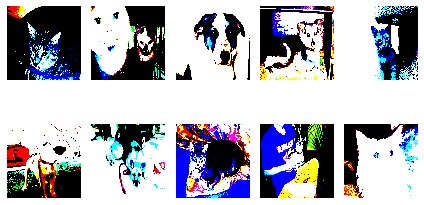

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [67]:
def plotImages (images_arr):
    fig , axes = plt.subplots(2,5)
    axes = axes.flatten()
    for img , ax in zip (images_arr ,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    
plotImages(imgs)
print(labels)

In [81]:
modelcnn = Sequential([Conv2D(filters=32 , kernel_size=(3,3),activation='relu' , padding='same' , input_shape = (224,224,3)),
                       MaxPool2D(pool_size=(2,2) , strides = 2),
                       Conv2D(filters = 64 , kernel_size=(3,3),activation='relu' , padding='same'),
                       MaxPool2D(pool_size=(2,2) , strides = 2)
                       ,Flatten()
                       ,Dense(units = 2 , activation='softmax')])

In [82]:
modelcnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [83]:
modelcnn.compile(optimizer=Adam(learning_rate=0.0001) , loss = 'categorical_crossentropy',metrics=['accuracy'])

In [84]:
modelcnn.fit (x=train_batch ,validation_data= valid_batch,epochs=10,verbose=2)

Epoch 1/10
Epoch 1/10
100/100 - 36s - loss: 17.8902 - acc: 0.5860 - val_loss: 7.0002 - val_acc: 0.5950
Epoch 2/10
Epoch 1/10
100/100 - 36s - loss: 2.8031 - acc: 0.7450 - val_loss: 3.0125 - val_acc: 0.5800
Epoch 3/10
Epoch 1/10
100/100 - 35s - loss: 0.3817 - acc: 0.8980 - val_loss: 2.6538 - val_acc: 0.6250
Epoch 4/10
Epoch 1/10
100/100 - 35s - loss: 0.0930 - acc: 0.9650 - val_loss: 2.6655 - val_acc: 0.6300
Epoch 5/10
Epoch 1/10
100/100 - 39s - loss: 0.0397 - acc: 0.9800 - val_loss: 2.5727 - val_acc: 0.6200
Epoch 6/10
Epoch 1/10
100/100 - 32s - loss: 0.0126 - acc: 0.9950 - val_loss: 2.5354 - val_acc: 0.6150
Epoch 7/10
Epoch 1/10
100/100 - 34s - loss: 0.0034 - acc: 0.9990 - val_loss: 2.6137 - val_acc: 0.6150
Epoch 8/10
Epoch 1/10
100/100 - 34s - loss: 0.0022 - acc: 1.0000 - val_loss: 2.5532 - val_acc: 0.6200
Epoch 9/10
Epoch 1/10
100/100 - 33s - loss: 6.8623e-04 - acc: 1.0000 - val_loss: 2.5534 - val_acc: 0.6200
Epoch 10/10
Epoch 1/10
100/100 - 33s - loss: 5.8411e-04 - acc: 1.0000 - val_l

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

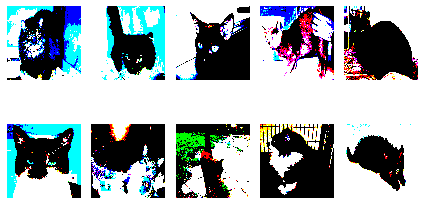

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [86]:
test_imgs , test_labels = next (test_batch)
plotImages(test_imgs)
print(test_labels)
#bec not shuffled

In [87]:
test_batch.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [89]:
prediction = modelcnn.predict (x=test_batch , verbose=0)


In [90]:
np.round(prediction)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [91]:
cm =  confusion_matrix(y_true=test_batch.classes , y_pred = np.argmax(prediction ,axis = -1))

In [93]:
cm.view()

array([[30, 20],
       [18, 32]], dtype=int64)

# Build fine-tuned VGG16 model 

In [135]:
vgg16last = tf.keras.applications.vgg16.VGG16()

In [136]:
vgg16last.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [137]:
type(vgg16last)\

tensorflow.python.keras.engine.training.Model

In [138]:
model = Sequential()
for layer in vgg16last.layers[:-1]: 
    model.add(layer)
model.add(Dense(units = 2 , activation = 'softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [139]:
for layer in model . layers[:-1] :
    layer . trainable = False
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [141]:
model.compile(optimizer=Adam(learning_rate=0.0001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.fit(x=train_batch ,validation_data = valid_batch ,epochs=5 , verbose= 2)

Epoch 1/5
Epoch 1/5
100/100 - 152s - loss: 0.4173 - acc: 0.8450 - val_loss: 0.1536 - val_acc: 0.9350
Epoch 2/5
Epoch 1/5
100/100 - 156s - loss: 0.0992 - acc: 0.9650 - val_loss: 0.0960 - val_acc: 0.9750
Epoch 3/5
Epoch 1/5
100/100 - 146s - loss: 0.0638 - acc: 0.9830 - val_loss: 0.0753 - val_acc: 0.9800
Epoch 4/5
Epoch 1/5
100/100 - 160s - loss: 0.0446 - acc: 0.9850 - val_loss: 0.0647 - val_acc: 0.9800
Epoch 5/5
Epoch 1/5
100/100 - 156s - loss: 0.0344 - acc: 0.9900 - val_loss: 0.0555 - val_acc: 0.9850


In [144]:
pred = model.predict(x=test_batch , verbose = 0)

In [145]:
test_batch . classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [149]:
cm = confusion_matrix (y_true = test_batch.classes , y_pred = np.argmax(pred , axis = -1))

In [151]:
cm.view()

array([[49,  1],
       [ 0, 50]], dtype=int64)

# MOBILNET

In [152]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 9s 1us/step


In [153]:
os.chdir('C:\\Users\\EGYPT\\Sign-Language-Digits-Dataset')
if os.path.isdir ('train\\0\\') is False :
    os.makedirs("train")
    os.makedirs("test")
    os.makedirs("valid")
    
    for i in range(0,10):
        shutil.move(f'{i}' ,'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples = random.sample(os.listdir(f'train/{i}') , 30 )
        for j in valid_samples:
            shutil.move (f"train/{i}/{j}" , f"valid/{i}")
            
        test_samples = random.sample(os.listdir(f'train/{i}') , 5 )
        for k in test_samples:
            shutil.move (f"train/{i}/{k}" , f"test/{i}")

    

In [155]:
train_path = 'C:\\Users\\EGYPT\\Sign-Language-Digits-Dataset\\train'
test_path = 'C:\\Users\\EGYPT\\Sign-Language-Digits-Dataset\\test'
valid_path = 'C:\\Users\\EGYPT\\Sign-Language-Digits-Dataset\\valid'

In [156]:
train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=train_path , target_size=(224,224) ,  batch_size=10)

test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=test_path , target_size=(224,224), batch_size=10 ,shuffle = False)

valid_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=valid_path , target_size=(224,224) , batch_size=10)

Found 1712 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [158]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [161]:
Y = mobile.layers[-6].output
output = Dense(units=10 , activation = 'softmax')(Y)

In [164]:
model = Model(inputs= mobile.input , outputs = output)

In [166]:
for layer in model . layers[:-23]:
    layer.trainable = False

In [167]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [169]:
model.compile(optimizer=Adam (lr=0.0001) , loss = "categorical_crossentropy" ,metrics = ['accuracy'])

In [170]:
model.fit(x=train_batch , validation_data=valid_batch,epochs=10,verbose=2)

Epoch 1/10
Epoch 1/10
172/172 - 134s - loss: 0.9081 - acc: 0.7389 - val_loss: 1.2881 - val_acc: 0.5667
Epoch 2/10
Epoch 1/10
172/172 - 133s - loss: 0.1873 - acc: 0.9650 - val_loss: 0.8504 - val_acc: 0.7100
Epoch 3/10
Epoch 1/10
172/172 - 139s - loss: 0.0902 - acc: 0.9918 - val_loss: 0.6751 - val_acc: 0.8033
Epoch 4/10
Epoch 1/10
172/172 - 138s - loss: 0.0506 - acc: 0.9947 - val_loss: 0.6373 - val_acc: 0.8133
Epoch 5/10
Epoch 1/10
172/172 - 141s - loss: 0.0497 - acc: 0.9965 - val_loss: 0.5426 - val_acc: 0.8667
Epoch 6/10
Epoch 1/10
172/172 - 128s - loss: 0.0274 - acc: 0.9982 - val_loss: 0.4842 - val_acc: 0.8700
Epoch 7/10
Epoch 1/10
172/172 - 123s - loss: 0.0195 - acc: 0.9994 - val_loss: 0.4607 - val_acc: 0.8867
Epoch 8/10
Epoch 1/10
172/172 - 128s - loss: 0.0389 - acc: 0.9982 - val_loss: 0.4092 - val_acc: 0.9133
Epoch 9/10
Epoch 1/10
172/172 - 128s - loss: 0.0169 - acc: 0.9988 - val_loss: 0.4182 - val_acc: 0.8933
Epoch 10/10
Epoch 1/10
172/172 - 129s - loss: 0.0108 - acc: 0.9994 - val_

In [171]:
test_label = test_batch . classes

In [172]:
pred = model .predict (x=test_batch)

In [173]:
cm = confusion_matrix (y_true = test_label , y_pred = pred.argmax(axis=-1))

In [174]:
cm.view()

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 5]], dtype=int64)

# Data(image) Augmantation

In [178]:
gen = ImageDataGenerator(rotation_range= 10 , width_shift_range=0.1,height_shift_range=0.1 , shear_range=0.15
                       , zoom_range =0.1 , channel_shift_range=10 , horizontal_flip =True)

In [190]:
chosen = random.choice (os.listdir("C:\\Users\\EGYPT\\train\\Train\\dog"))

In [191]:
image_path = 'C:\\Users\\EGYPT\\train\\Train\\dog\\' + chosen

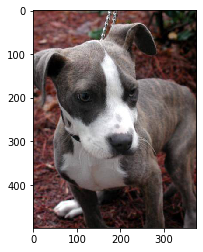

In [192]:
image = np.expand_dims(plt.imread(image_path) , 0)
plt.imshow(image[0])

In [193]:
aug_iter = gen.flow(image)

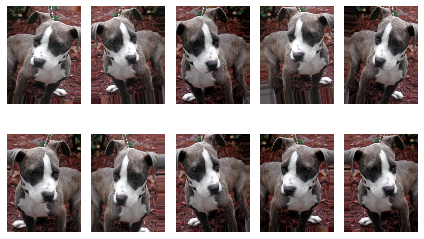

In [195]:
aug_images=[next(aug_iter)[0].astype(np.uint8) for i in range (10)]
plotImages(aug_images)